# Regresión Lineal Simple

En estadística la regresión lineal o ajuste lineal, es un método matemático que modela la relación entre una variable dependiente $Y$, y variables independientes $X_i$,
y un término aleatorio $\varepsilon$.


## Ecuación lineal

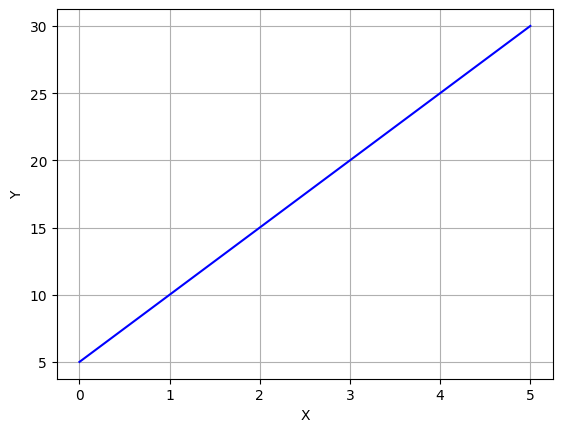

X=[0. 1. 2. 3. 4. 5.]
Y=[ 5. 10. 15. 20. 25. 30.]


In [1]:
import numpy as np
import matplotlib.pyplot as plt


eje_X = np.linspace(0,5,6)
constante = 5
X1 = 5
eje_Y = constante + ( X1 * eje_X )
plt.plot(eje_X,eje_Y,"b-")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.show()
print(f"X={eje_X}")
print(f"Y={eje_Y}")

## Ejemplo de base de datos de entrenamiento para precios de casa

[[195 460]
 [131 232]
 [142 315]
 [ 80 178]]


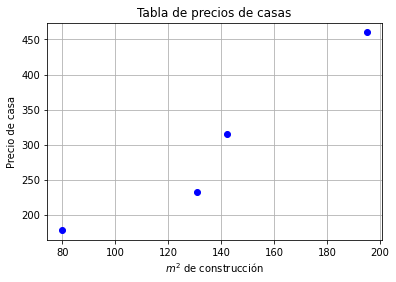

In [27]:
import numpy as np
import matplotlib.pyplot as plt

bdatos = np.array([[195,460],[131,232],[142,315],[80,178]])
print(bdatos)
plt.plot(bdatos[:,0],bdatos[:,1],"bo")
plt.xlabel("$m^2$ de construcción")
plt.ylabel("Precio de casa")
plt.title("Tabla de precios de casas")
plt.grid()
plt.show()

De lo anterior podemos establecer la siguiente notación:

[$m$] número de ejemplos de entrenamiento

[$x's$] Variable de entrada ó también característica

[$y's$] Variable de salida

[$(x,y)$] Un ejemplo de entrenamiento

[$(x^{(i)},\;y^{(i)})$] El í-esimo entrenamiento


Podemos decir entonces que el tamaño de la casa es $x$, y que el precio estimado es
$y$. Entonces nuestro algoritmo de aprendizaje deberá obtener un función que se
conoce como hipótesis, que mapea los datos de $x$ $\Rightarrow$ $y$.

Desglosando los pasos:

 [1] Tenemos una base de $m$ datos de entrenamiento que usaremos para alimentar nuestro algoritmo de aprendizaje.
 
 [2] Nuestro algoritmo de aprendizaje nos proporcionará como resultado de su análisis, una hipótesis.
 
 [3] Nuestra hipótesis nos servirá para pronosticar un valor de salida (en este caso: precio de la casa), para cualquier posible entrada (área de la casa).



# Función Hipótesis ($\hat{y}$)

La función hipótesis ($\hat{y}$) para este caso donde solo hay una variable de entrada, tiene la forma siguiente: 

$\hat{y}=b + \Theta_1 x_1$

donde $b \; y\; \Theta_1$ se conocen como parámetros del modelo y entonces nuestro problema se convierte en encontrar los valores adecuados para los parámetros del modelo.

# Función de error ($\mathscr{L}$)

$\mathscr{L}(\hat{y},y) = \frac{1}{2}(\hat{y}-y)^2$ 

# Función de costo (J)

$J=\frac{1}{m}{‎‎\sum}_{i=1}^m \mathscr{L}^i $

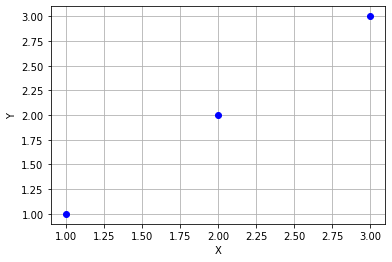

In [11]:
import numpy as np
import matplotlib.pyplot as plt

datos = np.array([[1,1],[2,2],[3,3]])
X = datos[:,0]
Y = datos[:,1]
plt.plot(X,Y,"bo")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.show()

Sabemos que $\hat{y}=b + \Theta x$, y si suponemos que los valores de los parámetros son:    
    b= 0    
    $\Theta= 0.5$
    
entonces la hipótesis queda:

$\hat{y}= 0.5 \cdot x$ 

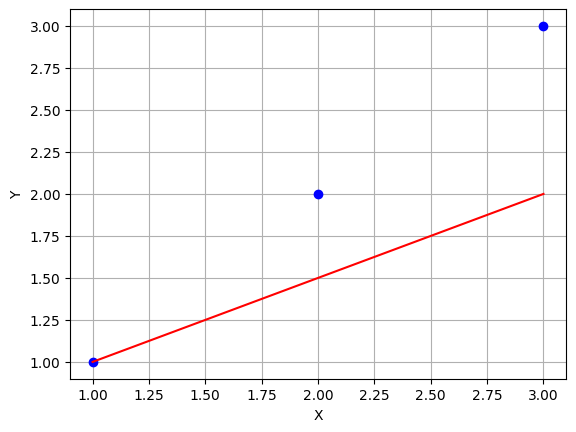

In [3]:
import numpy as np
import matplotlib.pyplot as plt

datos = np.array([[1,1],[2,2],[3,3]])
X = datos[:,0]
Y = datos[:,1]
plt.plot(X,Y,"bo")
plt.plot(X,.5+X*.5,"r-")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.show()

X	Y	ŷ	L
 [[0.    0.    0.    0.   ]
 [1.    1.    0.5   0.125]
 [2.    2.    1.    0.5  ]
 [3.    3.    1.5   1.125]]
J=  0.4375


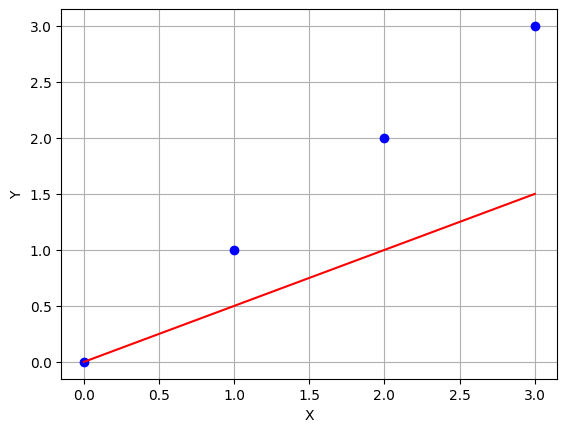

In [14]:
#Calcular la función de costo J
import numpy as np
import matplotlib.pyplot as plt

datos = np.array([[0,0],[1,1],[2,2],[3,3]])
X = datos[:,0]
Y = datos[:,1]

b = 0
Theta = .5
m = len(X)
salida = np.zeros((m,4))
J = 0
for i in range(m):
    salida[i,0] = X[i]
    salida[i,1] = Y[i]
    salida[i,2] = b + Theta * X[i]
    salida[i,3] = 0.5 * ( (b + Theta * X[i]) - Y[i])**2
    J += salida[i,3]
J = J / m
print("X\tY\tŷ\tL\n",salida)
print("J= ",J)
plt.plot(X,Y,"bo")
plt.plot(X,salida[:,2],"r-")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.show()


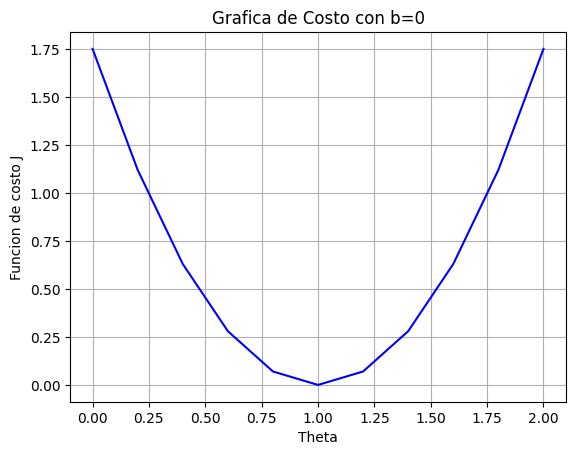

In [16]:
#Graficar la función de costo J
import numpy as np
import matplotlib.pyplot as plt

def getJ(X,Y,b,W):
    m = len(X)
    J = 0
    for i in range(m):
        J += ( (b + W * X[i]) - Y[i])**2
    J = J / (2*m)
    return J
    
datos = np.array([[0,0],[1,1],[2,2],[3,3]])
X = datos[:,0]
Y = datos[:,1]

b = 0
Ws = np.linspace(0,2,11)
J = np.zeros(len(Ws))
for a in range(len(Ws)):
    J[a] = getJ(X,Y,b,Ws[a])
    

plt.plot(Ws,J,"b-")
plt.xlabel("Theta")
plt.ylabel("Funcion de costo J")
plt.title(f"Grafica de Costo con b={b}")
plt.grid()
plt.show()

## Surfeando por los parámetros de la ecuación lineal

In [5]:
#Surfear la función de costo J
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import plotly.graph_objects as go

def getJ(X,Y,b,W):
    m = len(X)
    J = 0
    for i in range(m):
        J += ( (b + W * X[i]) - Y[i])**2
    J = J / (2*m)
    return J
    
datos = np.array([[0,0],[1,1],[2,2],[3,3]])
X = datos[:,0]
Y = datos[:,1]

b = np.linspace(-1,1,11)
Ws = np.linspace(0.5,1.5,11)
J = np.zeros([len(b),len(Ws)])
for iter_b in range(len(b)):
    for iter_Ws in range(len(Ws)):
        J[iter_b,iter_Ws] = getJ(X,Y,b[iter_b],Ws[iter_Ws])


#fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
#ax.plot_surface(b,Ws,J, cmap=cm.coolwarm,linewidth=0, antialiased=False)
#ax.grid()
#plt.show()

fig = go.Figure(data=[go.Surface(z=J, x=Ws, y=b)])
fig.update_layout(title='Grafica 3D de funcion costo', autosize=True)
fig.show()


## Algoritmo descendente de la función de costo  

El objetivo es encontrar los valores de los parámetros que minimicen el valor de la función de costo.

El algoritmo comienza con valores arbitrarios para los parámetros, y en cada iteración va ajustando los valores, de tal forma que en la siguiente iteración, la función de costo tenga un valor menor.

Esto se logra calculando la pendiente de la función de costo en ese punto dado, y usando esa pendiente ajustar los nuevos valores para la siguiente iteración.




Pseudocódigo del algoritmo descendente de la función de costo:

Tenemos cualquier función de costo $J(\Theta)$

Deseamos $\underset{\Theta}{minimizar}$ $J(\Theta)$
 
Entonces:

Empezamos con cualquier $b,\Theta_1$

Cambiamos $b,\Theta_1$ para reducir $J(\Theta)$ hasta alcanzar un mínimo.

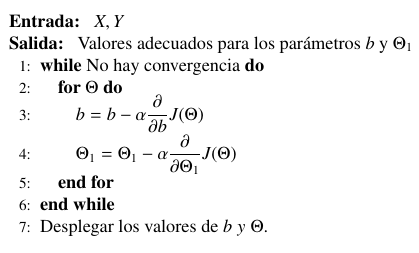

$\alpha$ se conoce como coeficiente de aprendizaje.

Los valores de las derivadas parciales son:
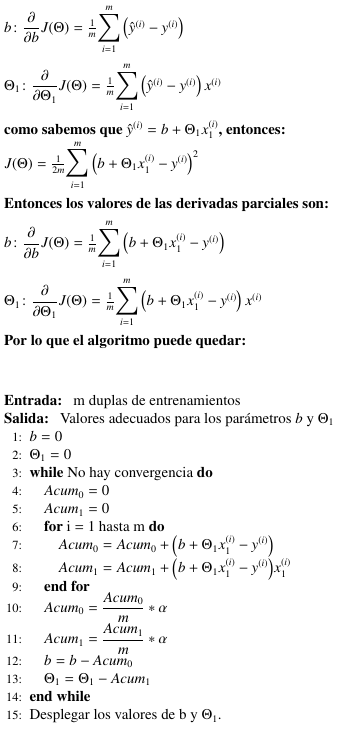

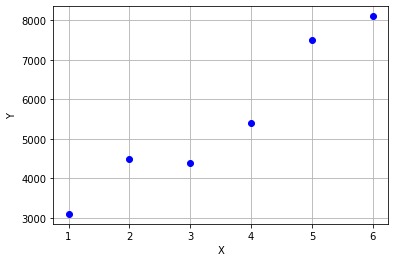

In [25]:
# Ejemplo de Regresión Lineal Simple:
import numpy as np
import matplotlib.pyplot as plt

datos = np.array([[1,3100],[2,4500],[3,4400],[4,5400],[5,7500],[6,8100]])
X = datos[:,0]
Y = datos[:,1]
plt.plot(X,Y,"bo")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.show()

In [15]:
print(X,Y)

[1 2 3 4 5 6] [3100 4500 4400 5400 7500 8100]


In [16]:
print(f"Forma de X: {X.shape}")
print(f"Forma de Y: {Y.shape}")

Forma de X: (6,)
Forma de Y: (6,)


In [17]:
X = X.reshape([X.size,1])
Y = Y.reshape([Y.size,1])
print(f"Forma de X: {X.shape}")
print(f"Forma de Y: {Y.shape}")

Forma de X: (6, 1)
Forma de Y: (6, 1)


In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

datos = pd.read_csv("./data/recta_origen.csv")
print("\nVista corta de los datos")
print(datos.head())
print("\nDescripcion de los datos")
print(datos.describe())
print(f"\ndatos de pandas: \n{datos}")
datos = datos.to_numpy()
print(f"\ndatos de numpy: \n{datos}")


Vista corta de los datos
   X  Y
0  1  1
1  2  2
2  3  3
3  4  4
4  5  5

Descripcion de los datos
              X         Y
count  5.000000  5.000000
mean   3.000000  3.000000
std    1.581139  1.581139
min    1.000000  1.000000
25%    2.000000  2.000000
50%    3.000000  3.000000
75%    4.000000  4.000000
max    5.000000  5.000000

datos de pandas: 
   X  Y
0  1  1
1  2  2
2  3  3
3  4  4
4  5  5

datos de numpy: 
[[1 1]
 [2 2]
 [3 3]
 [4 4]
 [5 5]]


m=5
tiempo = 171.875 ms
b = [1.01373118e-08]
w = [1.]


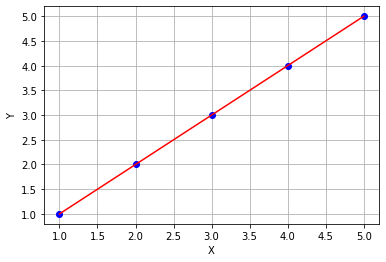

In [2]:
# Versión clásica del algoritmo
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#datos = np.array([[1,3100],[2,4500],[3,4400],[4,5400],[5,7500],[6,8100]])
datos = pd.read_csv("./data/recta_origen.csv")
#datos = pd.read_csv("./data/recta_desfase+5.csv")
datos = datos.to_numpy()

tic = time.process_time()
b = 0
W = 0
alpha = 0.1
x1 = datos[:,0]
Y = datos[:,1]
m = x1.size
print(f"m={m}")
x1 = x1.reshape([m,1])
Y = Y.reshape([m,1])

for iter1 in range(1000):
    acum0 = 0
    acum1 = 0
    for iter2 in range(m):
        acum0 +=  (b + W * x1[iter2,:])-Y[iter2]
        acum1 += ((b + W * x1[iter2,:])-Y[iter2]) * x1[iter2,:]
    acum0 = acum0 / m * alpha
    acum1 = acum1 / m * alpha
    b -= acum0
    W -= acum1
    #print(f"b = {b}")
    #print(f"w = {W}")
    #print("----")
    
toc = time.process_time()
print(f"tiempo = {(toc-tic) * 1000} ms")
print(f"b = {b}")
print(f"w = {W}")
Yp = x1 * W + b
#print(f"X= \n{x1}")
#print(f"Yp= \n{Yp}")
plt.plot(x1,Y,"bo")
plt.plot(x1,Yp,"r-")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.show()

tiempo = 46.875 ms
b = 1.8599629054550022
w = [[1.03000829]]


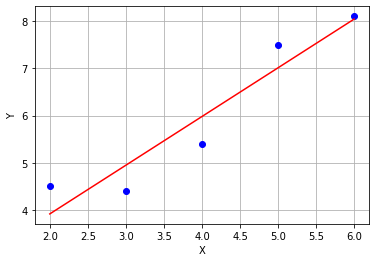

In [3]:
# Versión semi-vectorizada del algoritmo
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#datos = np.array([[1,3100],[2,4500],[3,4400],[4,5400],[5,7500],[6,8100]])
datos = pd.read_csv("./data/2do.csv")
#datos = pd.read_csv("./data/recta_desfase+5.csv")
datos = datos.to_numpy()
tic = time.process_time()
b = 0
W = np.zeros([1, 1])
alpha = 0.1
x1 = datos[:, 0]
Y = datos[:, 1]
m = x1.size
x1 = x1.reshape([x1.size, 1])
Y = Y.reshape([Y.size, 1])

for iter1 in range(1000):
    acum0 = (np.dot(x1, W)+b)-Y
    acum1 = ((np.dot(x1, W)+b)-Y) * x1
    b -= (np.mean(acum0) * alpha)
    W -= (np.mean(acum1) * alpha)

toc = time.process_time()
print(f"tiempo = {(toc-tic) * 1000} ms")
print(f"b = {b}")
print(f"w = {W}")
Yp = x1 * W + b
plt.plot(x1, Y, "bo")
plt.plot(x1, Yp, "r-")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.show()


# Ejemplo y predicción
#https://support.microsoft.com/es-es/office/estimacion-lineal-funci%C3%B3n-estimacion-lineal-84d7d0d9-6e50-4101-977a-fa7abf772b6d

Predecir el valor de las ventas para el noveno mes, de acuerdo a los primeros seis meses

b = 1.3217428432968812
w = [[1.15032027]]
J = [[0.1380001]]


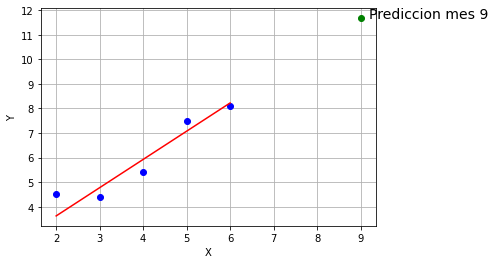

In [5]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def getJ(X,Y,b,W):
    m = len(X)
    J = 0
    for i in range(m):
        J += ( (b + W * X[i]) - Y[i])**2
    J = J / (2*m)
    return J

#datos = pd.read_csv("./data/ejemplo_regresion_lineal_microsoft.csv")
datos = pd.read_csv("./data/2do.csv")
datos = datos.to_numpy()
b = 0
W = np.zeros([1,1])
alpha = 0.01
x1 = datos[:,0]
Y = datos[:,1]
m = x1.size
x1 = x1.reshape([x1.size,1])
Y = Y.reshape([Y.size,1])

for iter1 in range(1000):
    acum0 = (np.dot(x1, W)+b)-Y
    acum1 = ((np.dot(x1, W)+b)-Y) * x1
    b -= (np.mean(acum0) * alpha)
    W -= (np.mean(acum1) * alpha)
    
print(f"b = {b}")
print(f"w = {W}")
Yp = x1 * W + b
plt.plot(x1,Y,"bo")
plt.plot(x1,Yp,"r-")
J = getJ(x1,Y,b,W)
print(f"J = {J}")

#print(f"Prediccion mes 9= {9 * W + b}")

#prediccion para el noveno mes

plt.plot(9,9 * W + b,"go")
plt.text(9+0.2,9 * W + b, "Prediccion mes 9",fontsize=14)

plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.show()

